# Modelo

In [13]:
# Se importan las librerías necesarias para el procesamiento de datos, manejo de tensores y construcción del modelo.
# pandas y numpy para manipulación de datos.
# sklearn para dividir el dataset.
# torch y sus submódulos para crear y entrenar la red neuronal.
# cv2 para procesamiento de imágenes.
# matplotlib para visualización.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import cv2
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt

In [14]:
# Se carga el dataset completo que contiene la información de las imágenes procesadas.
df_completo=pd.read_csv('dataset_completo_npy.csv')
df_completo

,SeriesInstanceUID,SOPInstanceUID,npy_path,x,y,label
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,1.2.826.0.1.3680043.8.498.66911171872877028453...,1.2.826.0.1.3680043.8.498.66911171872877028453...,-1.000000,-1.000000,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,1.2.826.0.1.3680043.8.498.10587118170829166010...,1.2.826.0.1.3680043.8.498.10587118170829166010...,-1.000000,-1.000000,0
2,1.2.826.0.1.3680043.8.498.10014757658335054766...,1.2.826.0.1.3680043.8.498.76601744454891248086...,1.2.826.0.1.3680043.8.498.76601744454891248086...,-1.000000,-1.000000,0
3,1.2.826.0.1.3680043.8.498.10021411248005513321...,1.2.826.0.1.3680043.8.498.81593405716626656866...,1.2.826.0.1.3680043.8.498.81593405716626656866...,-1.000000,-1.000000,0
4,1.2.826.0.1.3680043.8.498.10040419508532196461...,1.2.826.0.1.3680043.8.498.11401266297286362999...,1.2.826.0.1.3680043.8.498.11401266297286362999...,-1.000000,-1.000000,0
...,...,...,...,...,...,...
2642,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.10885430363476327277...,1.2.826.0.1.3680043.8.498.10885430363476327277...,204.232497,216.433289,1
2643,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.75978746530527925899...,1.2.826.0.1.3680043.8.498.75978746530527925899...,153.421602,188.455472,1
2644,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.88559536225248716051...,1.2.826.0.1.3680043.8.498.88559536225248716051...,364.014870,195.330855,1
2645,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.41770479778255354615...,1.2.826.0.1.3680043.8.498.41770479778255354615...,177.486989,210.557621,1


In [15]:
import numpy as np
import os

# Se define la ruta base donde se encuentran los archivos .npy.
base_dir = '/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/datos_procesados_npy/'

indices_validos = []

# Se itera sobre cada registro del dataset para verificar la integridad de los archivos.
for i in range(len(df_completo)):
    filename = df_completo['npy_path'][i]
    path = os.path.join(base_dir, filename)

    try:
        # Se comprueba si el archivo existe físicamente en el disco.
        if os.path.exists(path):
            img = np.load(path)
            # Se valida que las dimensiones de la imagen sean exactamente 512x512x3.
            if img.shape == (512, 512, 3):
                indices_validos.append(i)
            else:
                # Si las dimensiones son incorrectas, se elimina el archivo para evitar errores futuros.
                print(f"Eliminando {filename} por dimensiones incorrectas: {img.shape}")
                os.remove(path)
        else:
            print(f"Archivo no encontrado: {filename}")
    except Exception as e:
        print(f"Error procesando {filename}: {e}")

# Se filtra el DataFrame original conservando solo los registros con archivos válidos.
df_filtrado = df_completo.iloc[indices_validos].reset_index(drop=True)

Archivo no encontrado: 1.2.826.0.1.3680043.8.498.12524552726742591936607820382077304797.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.37968147245973562230977823049232474212.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.12112808457186454422752724768665392380.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.97121094041712829608625148100059963709.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.97121094041712829608625148100059963709.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.19224467190200667623464386249242006134.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.73981904975387593351832419181112323522.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.75624390816274267057679985409783222714.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.17068119801903677540294516696338424399.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.11678059097199251350380591511662657565.npy
Archivo no encontrado: 1.2.826.0.1.3680043.8.498.1021670885207474523744593065219

In [16]:
df_filtrado

,SeriesInstanceUID,SOPInstanceUID,npy_path,x,y,label
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,1.2.826.0.1.3680043.8.498.66911171872877028453...,1.2.826.0.1.3680043.8.498.66911171872877028453...,-1.000000,-1.000000,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,1.2.826.0.1.3680043.8.498.10587118170829166010...,1.2.826.0.1.3680043.8.498.10587118170829166010...,-1.000000,-1.000000,0
2,1.2.826.0.1.3680043.8.498.10014757658335054766...,1.2.826.0.1.3680043.8.498.76601744454891248086...,1.2.826.0.1.3680043.8.498.76601744454891248086...,-1.000000,-1.000000,0
3,1.2.826.0.1.3680043.8.498.10021411248005513321...,1.2.826.0.1.3680043.8.498.81593405716626656866...,1.2.826.0.1.3680043.8.498.81593405716626656866...,-1.000000,-1.000000,0
4,1.2.826.0.1.3680043.8.498.10040419508532196461...,1.2.826.0.1.3680043.8.498.11401266297286362999...,1.2.826.0.1.3680043.8.498.11401266297286362999...,-1.000000,-1.000000,0
...,...,...,...,...,...,...
2617,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.10885430363476327277...,1.2.826.0.1.3680043.8.498.10885430363476327277...,204.232497,216.433289,1
2618,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.75978746530527925899...,1.2.826.0.1.3680043.8.498.75978746530527925899...,153.421602,188.455472,1
2619,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.88559536225248716051...,1.2.826.0.1.3680043.8.498.88559536225248716051...,364.014870,195.330855,1
2620,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.41770479778255354615...,1.2.826.0.1.3680043.8.498.41770479778255354615...,177.486989,210.557621,1


In [17]:
# Se verifica la distribución de clases en el dataset filtrado.
df_filtrado['label'].value_counts()

label
1    1473
0    1149
Name: count, dtype: int64

In [18]:
# Se obtienen los identificadores únicos de los pacientes para realizar la división del dataset a nivel de paciente.
pacientes_unicos = df_filtrado['SeriesInstanceUID'].unique()
pacientes_unicos

array(['1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647',
       '1.2.826.0.1.3680043.8.498.10004684224894397679901841656954650085',
       '1.2.826.0.1.3680043.8.498.10014757658335054766479957992112625961',
       ...,
       '1.2.826.0.1.3680043.8.498.99887675554378211308175946117895608384',
       '1.2.826.0.1.3680043.8.498.99892390884723813599532075083872271516',
       '1.2.826.0.1.3680043.8.498.99985209798463601651869595532975221005'],
      shape=(2334,), dtype=object)

In [19]:
# Se divide la lista de pacientes en conjuntos de entrenamiento (80%), validación (10%) y prueba (10%).
# Esto evita la fuga de datos (data leakage), asegurando que imágenes del mismo paciente no estén en sets diferentes.
train_ids, temp_ids = train_test_split(pacientes_unicos, test_size=0.2, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

In [20]:
# Se crean los DataFrames correspondientes a cada conjunto filtrando por los IDs de pacientes seleccionados.
df_train = df_filtrado[df_filtrado['SeriesInstanceUID'].isin(train_ids)].reset_index(drop=True)
df_val = df_filtrado[df_filtrado['SeriesInstanceUID'].isin(val_ids)].reset_index(drop=True)
df_test = df_filtrado[df_filtrado['SeriesInstanceUID'].isin(test_ids)].reset_index(drop=True)

# Se imprimen las estadísticas de la división.
print(f"Total Pacientes: {len(pacientes_unicos)}")
print(f"Train: {len(df_train)} imágenes ({len(train_ids)} pacientes)")
print(f"Val: {len(df_val)} imágenes ({len(val_ids)} pacientes)")
print(f"Test: {len(df_test)} imágenes ({len(test_ids)} pacientes)")

Total Pacientes: 2334
Train: 2095 imágenes (1867 pacientes)
Val: 272 imágenes (233 pacientes)
Test: 255 imágenes (234 pacientes)


In [ ]:
class AneurysmDataset(Dataset):
    """
    Clase para cargar el dataset de aneurismas en PyTorch.
    """
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        # Se carga la imagen .npy (RGB) y se normaliza dividiendo por 255.0.
        img_path = os.path.join(self.img_dir, row['npy_path'])
        image = np.load(img_path).astype(np.float32) / 255.0  
        
        # Se inicializa la máscara de segmentación (Ground Truth) con ceros (fondo).
        mask = np.zeros((512, 512), dtype=np.float32)
        
        # Si la etiqueta es 1 (aneurisma), se dibuja un círculo blanco en la posición indicada.
        if row['label'] == 1:
            cx = int(row['x'])
            cy = int(row['y'])
            
            # Se dibuja un círculo de radio 12 píxeles para representar el área del aneurisma.
            cv2.circle(mask, (cx, cy), 12, 1.0, -1)
            
    
        # Se binariza la máscara para asegurar valores estrictos de 0.0 o 1.0.
        mask = (mask > 0.5).astype(np.float32)
        
        # Se asegura que la imagen tenga 3 canales (RGB).
        if len(image.shape) == 2:
            image = np.stack([image]*3, axis=-1)
            
        # Se transponen las dimensiones de (H, W, C) a (C, H, W) como requiere PyTorch.
        image = image.transpose(2, 0, 1)
        # Se añade una dimensión extra a la máscara para que sea (1, H, W).
        mask = np.expand_dims(mask, axis=0)
        
        return torch.from_numpy(image), torch.from_numpy(mask)

In [22]:
# Se definen los parámetros de carga y se crean los DataLoaders para entrenamiento y validación.
BATCH_SIZE = 16
NPY_FOLDER = '/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/datos_procesados_npy/'

train_dataset = AneurysmDataset(df_train, NPY_FOLDER)
val_dataset = AneurysmDataset(df_val, NPY_FOLDER)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [23]:
# Se configura el dispositivo de ejecución (CPU o GPU).
device = torch.device('cpu')
print(f"Usando dispositivo: {device}")

import segmentation_models_pytorch as smp

# Se instancia el modelo U-Net utilizando una arquitectura ResNet34 preentrenada como codificador.
# Se utiliza 'scse' (Squeeze and Excitation) en el decodificador para mejorar la atención espacial.
model = smp.Unet(
    encoder_name="resnet34", 
    decoder_attention_type='scse',        
    encoder_weights="imagenet",     # Pesos preentrenados en ImageNet.
    in_channels=3,                  # Entrada RGB.
    classes=1,                      # Salida binaria (máscara de aneurisma).
    activation=None                 # Sin activación final (se aplica en la función de pérdida).
)

# Se mueve el modelo al dispositivo seleccionado.
model = model.to(device)

print("Modelo preentrenado cargado")

Usando dispositivo: cpu
Modelo preentrenado cargado
Modelo preentrenado cargado


In [24]:
# Se define la función de pérdida Tversky Loss, configurada para priorizar la sensibilidad (Recall).
# Un valor alto de beta (0.9) penaliza fuertemente los falsos negativos, forzando al modelo a detectar aneurismas.
criterion = smp.losses.TverskyLoss(
    mode='binary', 
    alpha=0.1,  # Penaliza menos los Falsos Positivos
    beta=0.9,   # Penaliza MUCHO los Falsos Negativos (fuerza a detectar)
    from_logits=True
)

# Se configura el optimizador AdamW con weight decay para regularización.
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
num_epochs = 25

# Se configuran los parámetros para el Early Stopping (parada temprana).
patience = 5
best_val_loss = float('inf')
epochs_no_improve = 0
max_loss_increment = 0.1  

# Listas para almacenar el historial de pérdidas.
train_loss_history = []
val_loss_history = []


def calculate_accuracy(y_pred, y_true):
    """Calcula la precisión píxel a píxel."""
    y_pred = torch.sigmoid(y_pred)
    y_pred = (y_pred > 0.3).float()
    correct = (y_pred == y_true).float().sum()
    return correct / y_true.numel()


# Bucle principal de entrenamiento.
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    
    # Fase de entrenamiento.
    for batch_idx, (images, masks) in enumerate(train_loader):
        images = images.to(device)
        masks = masks.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_acc += calculate_accuracy(outputs, masks).item()
        
        if batch_idx % 50 == 0:
            print(f"Epoca {epoch+1} | Batch {batch_idx}/{len(train_loader)}")
        
    # Fase de validación.
    model.eval()
    val_loss = 0
    
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()
          

    # Se calculan los promedios de pérdida por época.
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    
    # Se guarda el historial.
    train_loss_history.append(avg_train_loss)
    val_loss_history.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # Se detiene si la pérdida de validación aumenta bruscamente.
    if avg_val_loss > (best_val_loss + max_loss_increment):
        break
    
    # Se guarda el modelo si mejora la pérdida de validación.
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'unet_aneurysm_best.pth')
        
    else:
        epochs_no_improve += 1
        
    # Se detiene si no hay mejora después de 'patience' épocas.
    if epochs_no_improve >= patience:
        print("Early Stopping.")
        break

# Se carga el mejor modelo guardado al finalizar el entrenamiento.
model.load_state_dict(torch.load('unet_aneurysm_best.pth'))
print(f"Mejor modelo (Val Loss: {best_val_loss:.4f})")

Epoca 1 | Batch 0/131
Epoca 1 | Batch 50/131
Epoca 1 | Batch 50/131
Epoca 1 | Batch 100/131
Epoca 1 | Batch 100/131
Epoch 1/25 | Train Loss: 0.9725 | Val Loss: 0.5505
Epoch 1/25 | Train Loss: 0.9725 | Val Loss: 0.5505
Epoca 2 | Batch 0/131
Epoca 2 | Batch 0/131
Epoca 2 | Batch 50/131
Epoca 2 | Batch 50/131
Epoca 2 | Batch 100/131
Epoca 2 | Batch 100/131
Epoch 2/25 | Train Loss: 0.9381 | Val Loss: 0.5097
Epoch 2/25 | Train Loss: 0.9381 | Val Loss: 0.5097
Epoca 3 | Batch 0/131
Epoca 3 | Batch 0/131
Epoca 3 | Batch 50/131
Epoca 3 | Batch 50/131
Epoca 3 | Batch 100/131
Epoca 3 | Batch 100/131
Epoch 3/25 | Train Loss: 0.8352 | Val Loss: 0.3920
Epoch 3/25 | Train Loss: 0.8352 | Val Loss: 0.3920
Epoca 4 | Batch 0/131
Epoca 4 | Batch 0/131
Epoca 4 | Batch 50/131
Epoca 4 | Batch 50/131
Epoca 4 | Batch 100/131
Epoca 4 | Batch 100/131
Epoch 4/25 | Train Loss: 0.5990 | Val Loss: 0.2552
Epoch 4/25 | Train Loss: 0.5990 | Val Loss: 0.2552
Epoca 5 | Batch 0/131
Epoca 5 | Batch 0/131
Epoca 5 | Batch 50

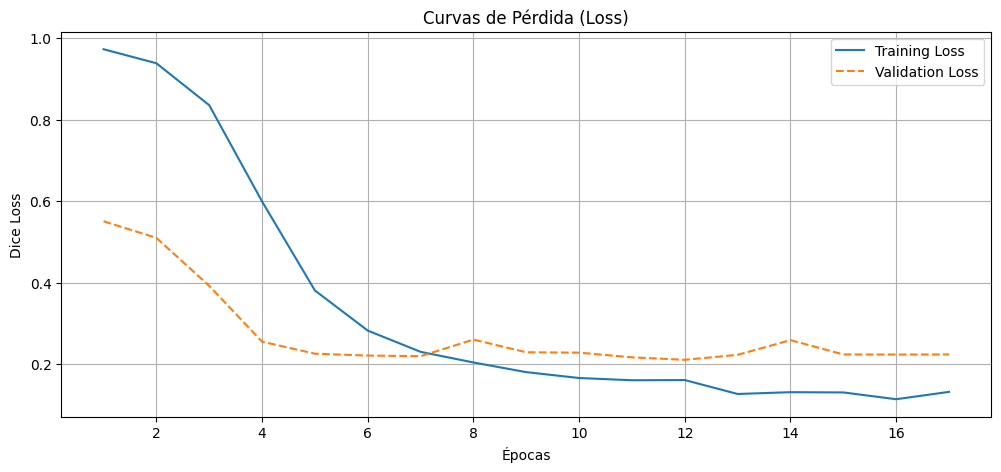

In [25]:
# Se grafican las curvas de pérdida de entrenamiento y validación para analizar el aprendizaje.
plt.figure(figsize=(12, 5))

plt.plot(range(1, epoch+2), train_loss_history, label='Training Loss')
plt.plot(range(1, epoch+2), val_loss_history, label='Validation Loss', linestyle='--')
plt.xlabel('Épocas')
plt.ylabel('Dice Loss')
plt.title('Curvas de Pérdida (Loss)')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Se prepara el conjunto de prueba para la evaluación final.
test_dataset = AneurysmDataset(df_test, NPY_FOLDER)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False) # Batch 1 para evaluar una por una

model.eval() # Modo evaluación
test_dice_score = 0

In [27]:
# Se calcula el Dice Score promedio en el conjunto de prueba.
with torch.no_grad():
    for images, masks in test_loader:
        images = images.to(device)
        masks = masks.to(device)
        outputs = model(images)
    
    # Se utiliza la relación: DiceScore = 1 - DiceLoss (aproximado por la función de pérdida).
        loss = criterion(outputs, masks)
        test_dice_score += (1 - loss.item())
        avg_test_dice = test_dice_score / len(test_loader)
print(f"Resultados Finales:")
print(f"Dice Score Promedio en Test: {avg_test_dice:.4f}")

Resultados Finales:
Dice Score Promedio en Test: 0.7810


In [ ]:
def visualizar_predicciones_balanceadas(model, dataset, df_test, num_samples=3):
    """
    Muestra predicciones asegurando ver casos con aneurisma y casos sanos.
    """
    model.eval()
    
    # Se separan los índices de pacientes enfermos y sanos en el set de prueba.
    indices_enfermos = df_test[df_test['label'] == 1].index.tolist()
    indices_sanos = df_test[df_test['label'] == 0].index.tolist()
    
    # Se seleccionan muestras aleatorias de cada grupo.
    sel_enfermos = random.sample(indices_enfermos, min(num_samples, len(indices_enfermos)))
    sel_sanos = random.sample(indices_sanos, min(num_samples, len(indices_sanos)))
    
    indices_a_mostrar = sel_enfermos + sel_sanos
    random.shuffle(indices_a_mostrar) # Se mezclan para visualización variada.
    
    print(f"Mostrando {len(indices_a_mostrar)} ejemplos (Mezcla de sanos y enfermos)")
    
    for idx in indices_a_mostrar:
        # Se obtienen los datos del dataset.
        image_tensor, mask_tensor = dataset[idx]
        row_info = df_test.iloc[idx]
        
        # Se prepara el tensor de entrada.
        input_tensor = image_tensor.unsqueeze(0).to(device)
        
        # Se realiza la predicción.
        with torch.no_grad():
            output = model(input_tensor)
            pred_prob = torch.sigmoid(output).cpu().numpy()[0, 0]
            
            # Aquí se decide si un píxel es aneurisma o no.
            # Se ha ajustado el umbral a 0.3 para aumentar la sensibilidad del modelo.
            pred_mask = pred_prob > 0.3
            
        # Se prepara la imagen para mostrar (solo el canal central verde).
        img_numpy = image_tensor.numpy()
        img_central = img_numpy[1, :, :] 
        
        true_mask = mask_tensor.numpy()[0]
        
        # Se generan los gráficos comparativos.
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        
        # 1. Imagen Central Original.
        ax[0].imshow(img_central, cmap='gray')
        tipo = "ENFERMO" if row_info['label'] == 1 else "SANO"
        ax[0].set_title(f"Paciente: {row_info['SeriesInstanceUID'][:8]}...\nTipo: {tipo}")
        ax[0].axis('off')
        
        # 2. Máscara Real (Ground Truth).
        ax[1].imshow(true_mask, cmap='gray')
        ax[1].set_title("Ground Truth (Real)")
        ax[1].axis('off')
        
        # 3. Mapa de Calor de Probabilidad.
        im3 = ax[2].imshow(pred_prob, cmap='jet', vmin=0, vmax=1)
        ax[2].set_title("Probabilidad IA")
        ax[2].axis('off')
        plt.colorbar(im3, ax=ax[2], fraction=0.046, pad=0.04)
        
        # 4. Predicción Binaria Final.
        ax[3].imshow(pred_mask, cmap='gray')
        ax[3].set_title("Predicción Final (>0.3)")
        ax[3].axis('off')
        
        plt.tight_layout()
        plt.show()

Mostrando 6 ejemplos (Mezcla de sanos y enfermos)


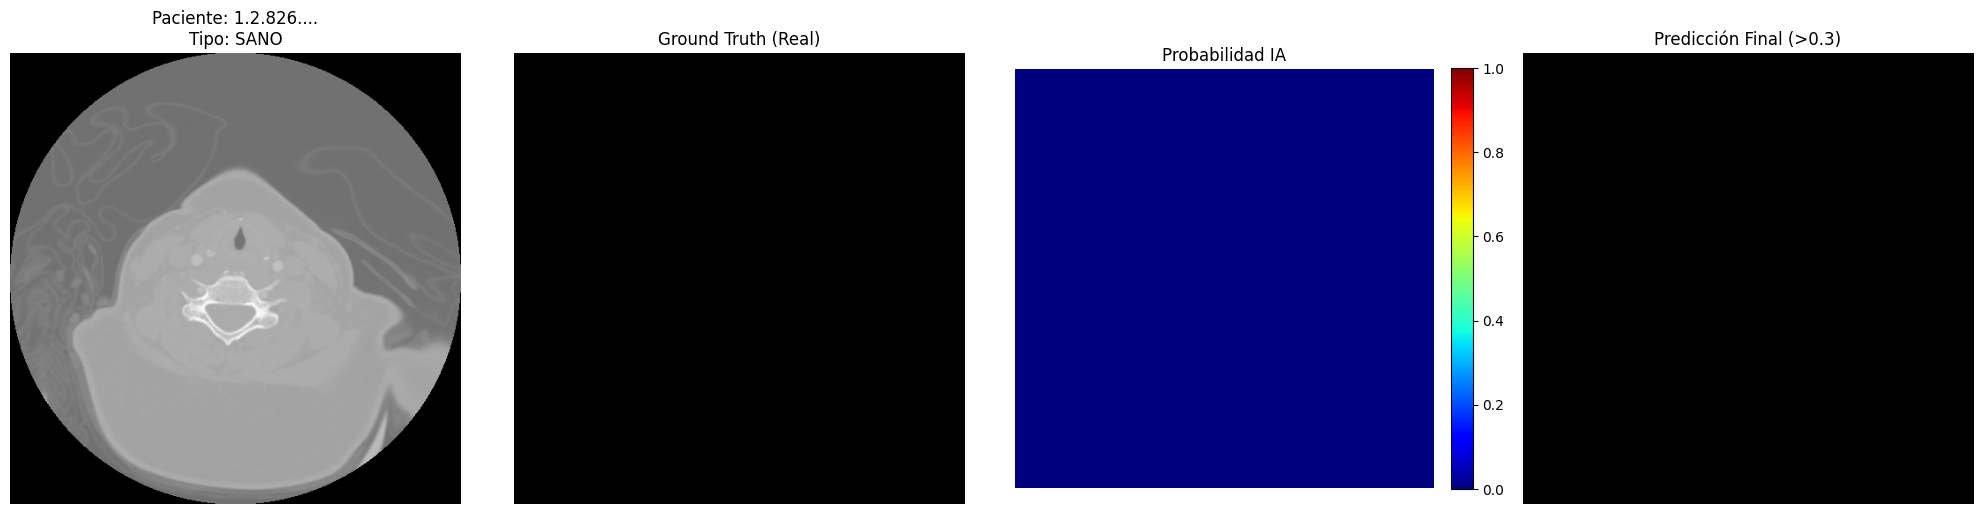

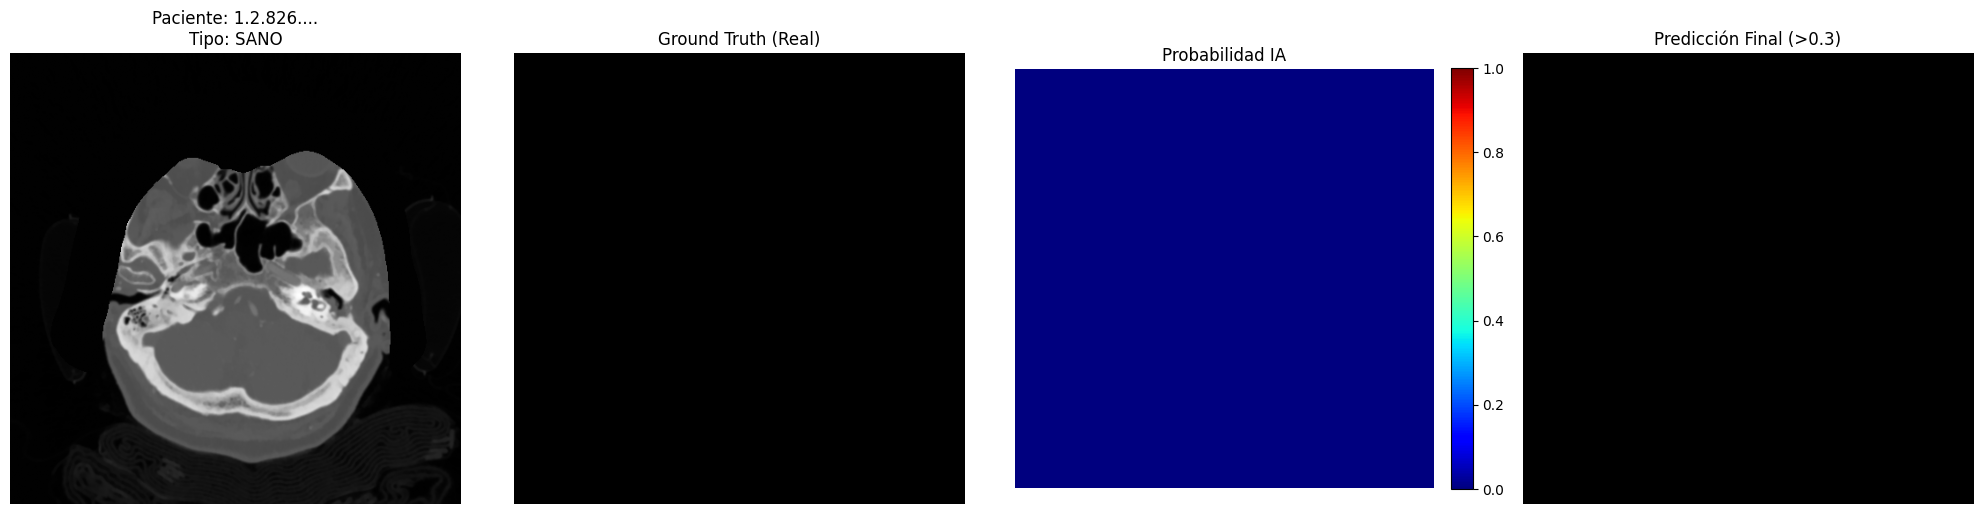

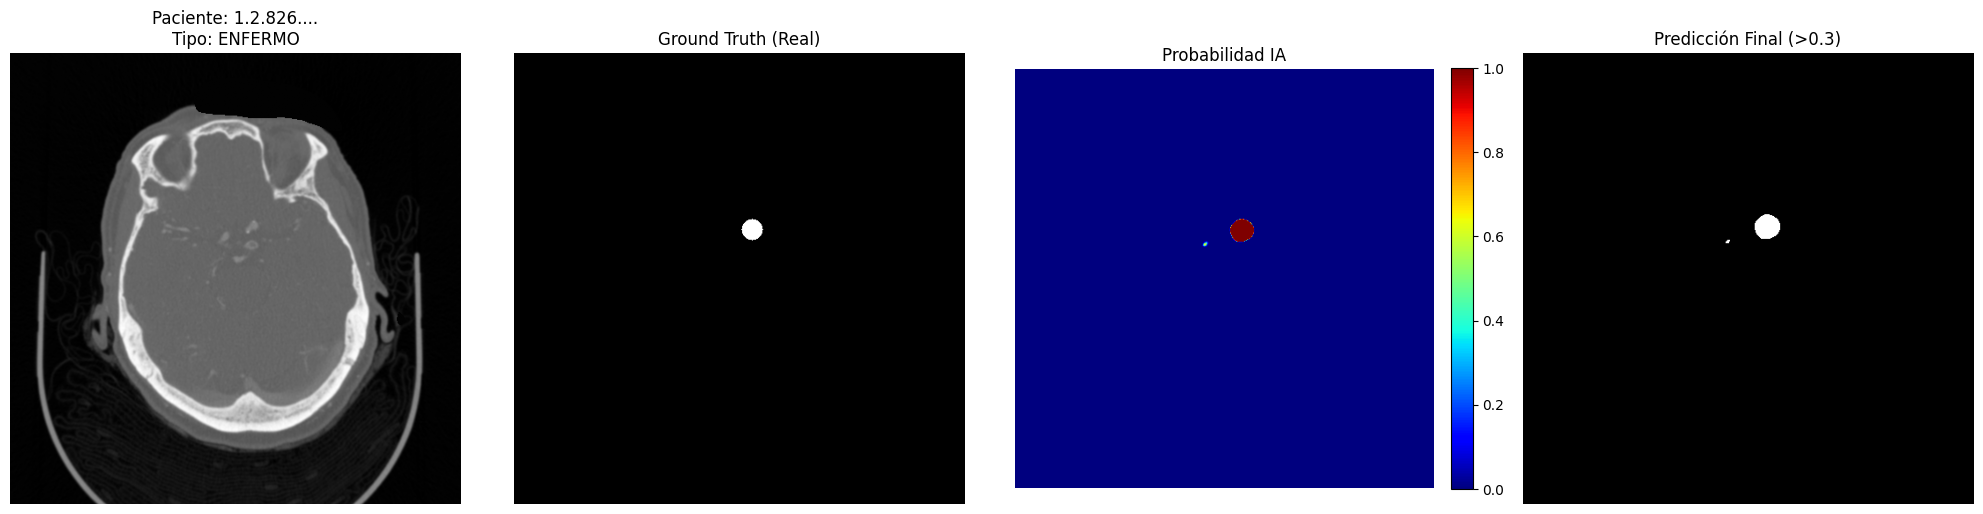

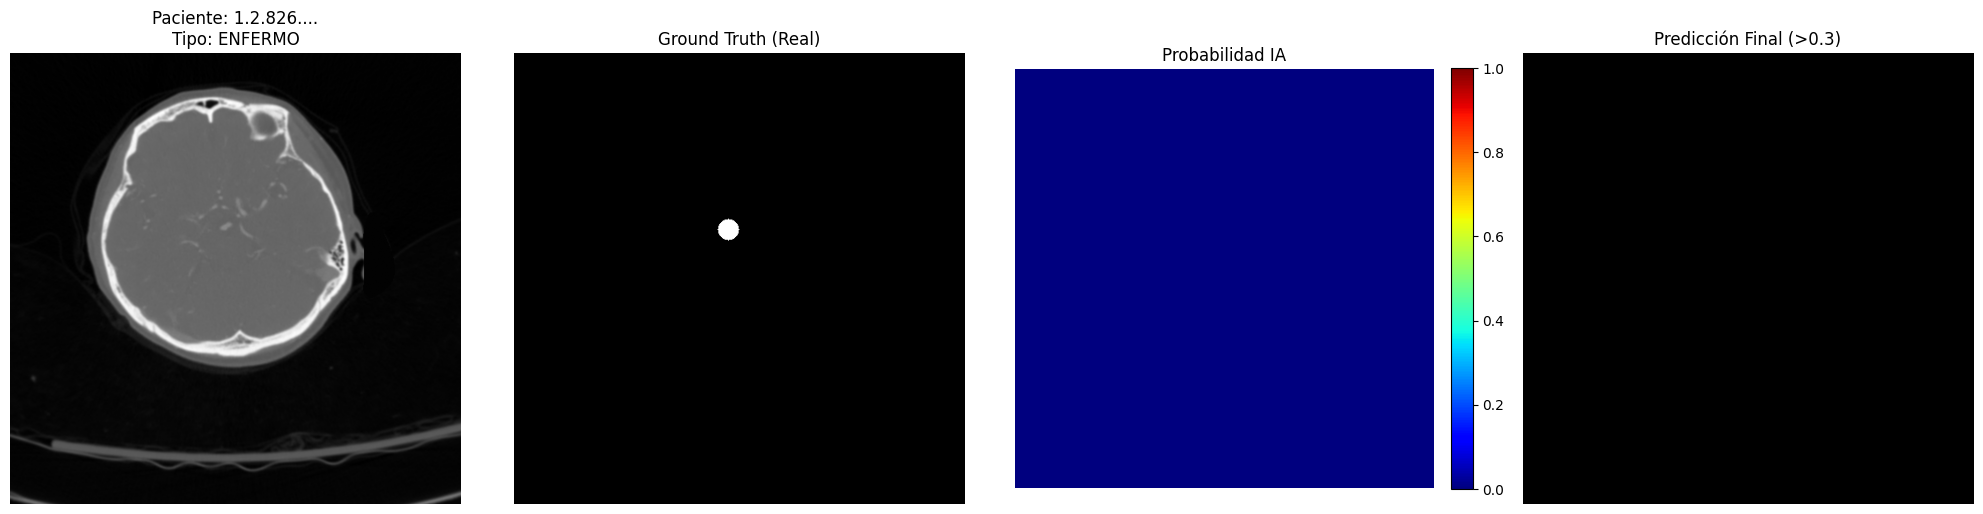

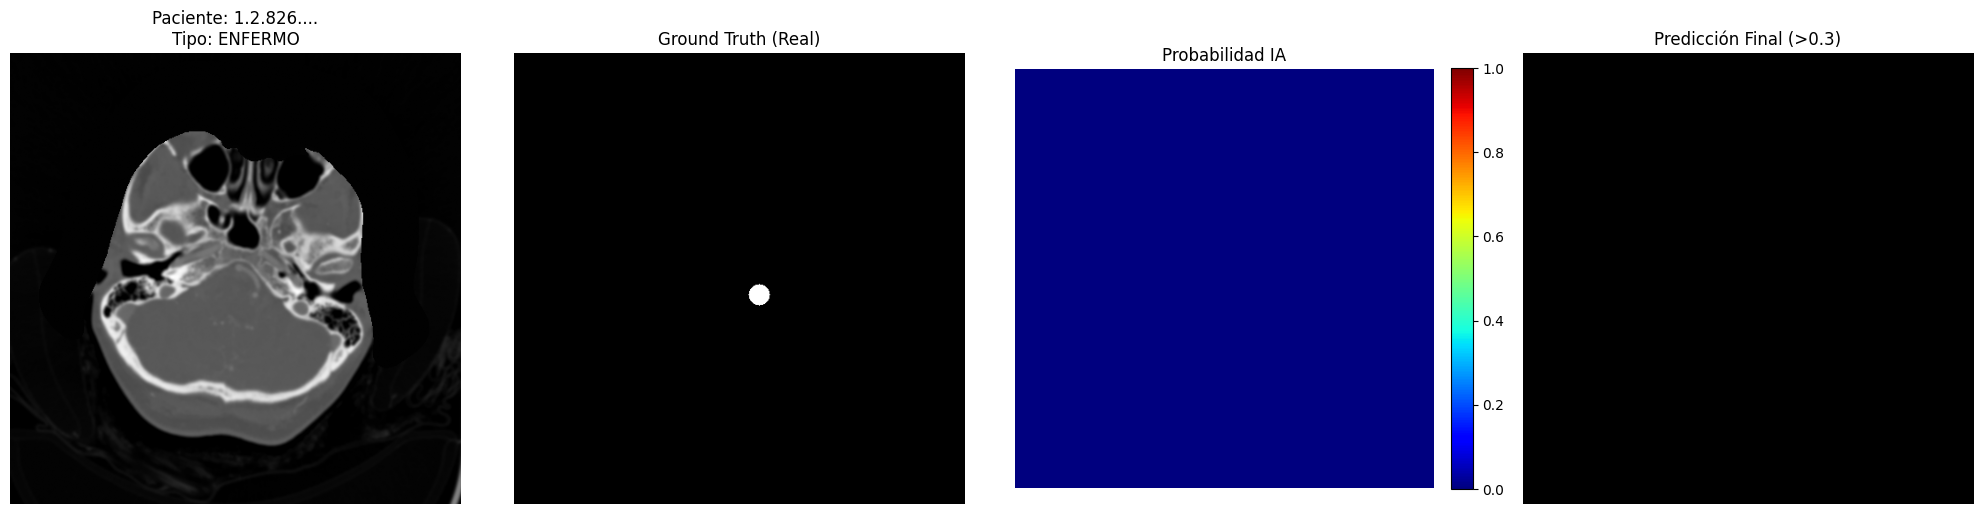

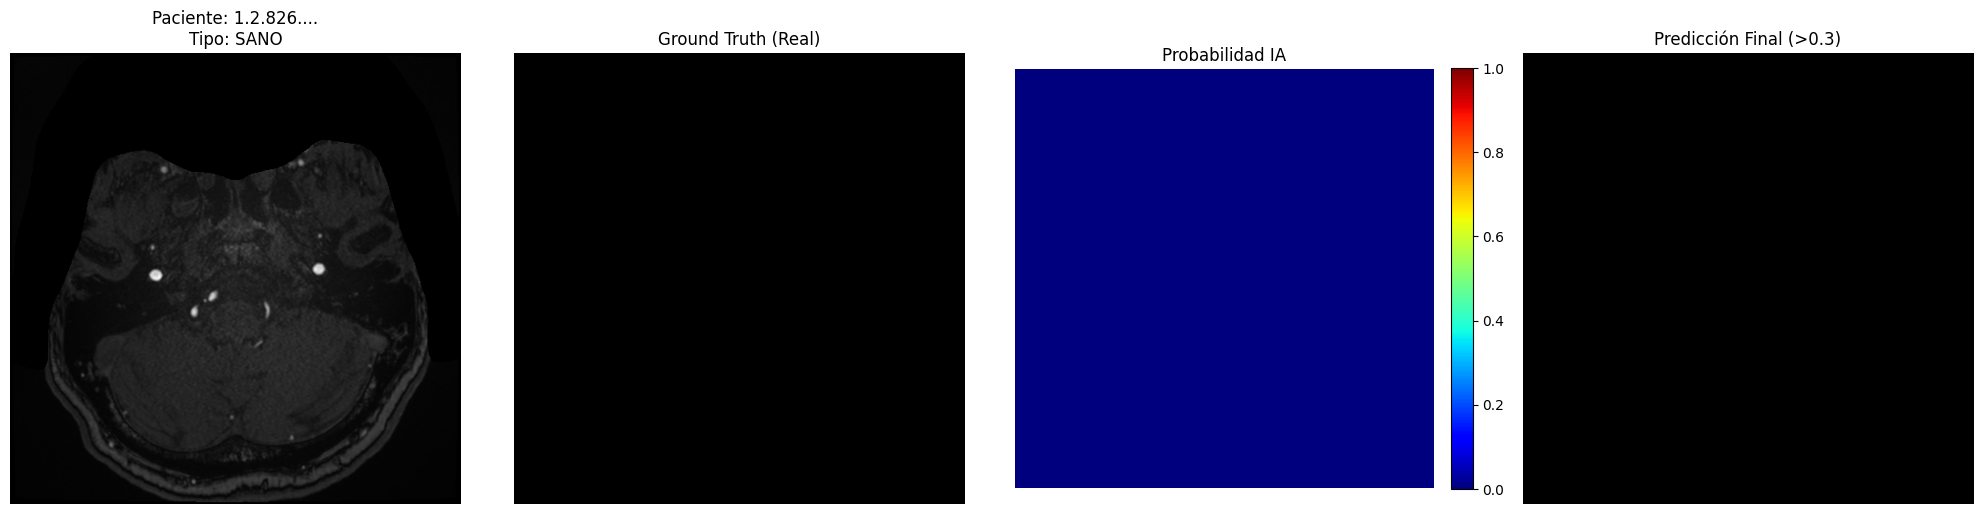

In [29]:
# Se ejecuta la función de visualización para inspeccionar cualitativamente los resultados.
if 'test_dataset' not in locals():
    test_dataset = AneurysmDataset(df_test, NPY_FOLDER)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    print("Dataset de Test creado.")

visualizar_predicciones_balanceadas(model, test_dataset, df_test, num_samples=3)

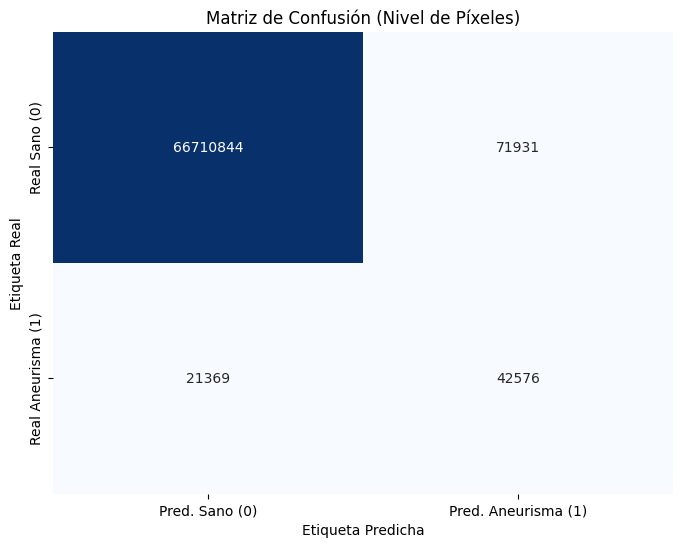

Métricas
Sensibilidad:  0.6658 (Capacidad de detectar aneurismas)
Especificidad: 0.9989 (Capacidad de descartar sanos)
Precisión:     0.3718
F1-Score:      0.4772


In [30]:
import seaborn as sns

def graficar_matriz_confusion(model, loader, device):
    """
    Calcula y grafica la matriz de confusión a nivel de píxeles.
    """
    model.eval()
    
    # Contadores para la matriz de confusión.
    TP = 0 # Verdaderos Positivos
    TN = 0 # Verdaderos Negativos
    FP = 0 # Falsos Positivos
    FN = 0 # Falsos Negativos
    
    with torch.no_grad():
        for images, masks in loader:
            images = images.to(device)
            masks = masks.to(device)
            
            outputs = model(images)
            
            # --- ANÁLISIS DEL THRESHOLD (UMBRAL) ---
            # Se aplica el umbral de 0.3 para calcular las métricas finales, priorizando la detección.
            preds = (torch.sigmoid(outputs) > 0.3).float()
            
            # Se aplanan los tensores para comparar píxel a píxel.
            preds = preds.view(-1)
            masks = masks.view(-1)
            
            TP += ((preds == 1) & (masks == 1)).sum().item()
            TN += ((preds == 0) & (masks == 0)).sum().item()
            FP += ((preds == 1) & (masks == 0)).sum().item()
            FN += ((preds == 0) & (masks == 1)).sum().item()
            
    # Se construye la matriz.
    cm = np.array([[TN, FP], [FN, TP]])
    
    # Se calculan las métricas de rendimiento.
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0 # Recall
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    
    # Se grafica la matriz de confusión.
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=['Pred. Sano (0)', 'Pred. Aneurisma (1)'],
                yticklabels=['Real Sano (0)', 'Real Aneurisma (1)'])
    
    plt.title('Matriz de Confusión (Nivel de Píxeles)')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()
    
    print(f"Métricas")
    print(f"Sensibilidad:  {sensitivity:.4f} (Capacidad de detectar aneurismas)")
    print(f"Especificidad: {specificity:.4f} (Capacidad de descartar sanos)")
    print(f"Precisión:     {precision:.4f}")
    print(f"F1-Score:      {f1_score:.4f}")

# Se ejecuta la función de matriz de confusión.
graficar_matriz_confusion(model, test_loader, device)

Generando Curva Precision-Recall


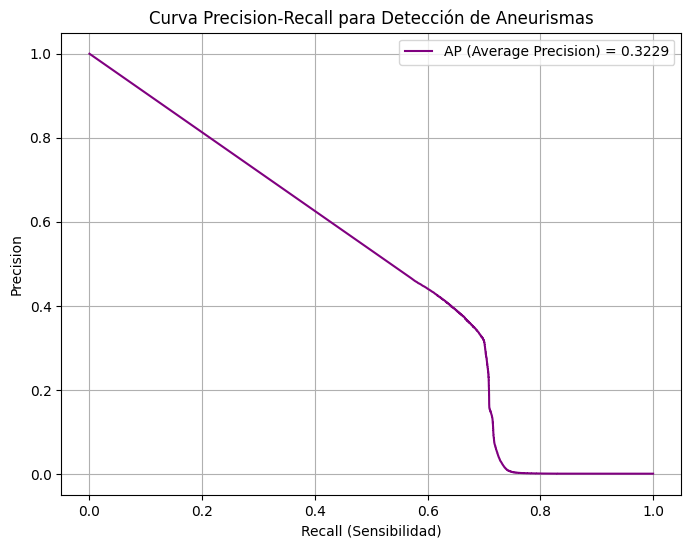

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def graficar_curva_pr(model, loader, device):
    """
    Calcula y grafica la curva Precision-Recall.
    Ideal para datasets desbalanceados como este (pocos píxeles de aneurisma vs muchos de fondo).
    """
    model.eval()
    y_true = []
    y_scores = []
    
    print("Generando Curva Precision-Recall")
    
    with torch.no_grad():
        for images, masks in loader:
            images = images.to(device)
            masks = masks.to(device)
            
            outputs = model(images)
            prob_map = torch.sigmoid(outputs)
            
            # Se aplanan los resultados y se mueven a CPU para procesamiento con sklearn.
            y_true.extend(masks.view(-1).cpu().numpy())
            y_scores.extend(prob_map.view(-1).cpu().numpy())
            
    # Se calculan los valores de precisión y recall para diferentes umbrales.
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    
    # Se grafica la curva.
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'AP (Average Precision) = {ap:.4f}', color='purple')
    plt.xlabel('Recall (Sensibilidad)')
    plt.ylabel('Precision')
    plt.title('Curva Precision-Recall para Detección de Aneurismas')
    plt.legend()
    plt.grid(True)
    plt.show()

# Se ejecuta el análisis de la curva Precision-Recall.
graficar_curva_pr(model, test_loader, device)